# Analysis and plotting Notebook

### TODO

Test the different modalities of decoding

### Notes:

- Currently, there seem to be a problem about decoding the whole sentence embeddings (LASER)

What works however, is:

- For words: 
    
    - everytype of decoding (embeddings, wlength) no matter the start works

- For constituents: 

    - wlength works perfectly, 
    - sum of word embeddings (1,2,3) works
    - constituent embeddings not yet

- For sentences

    - wlength works perfectly
    - sum of word embeddings (1) works



### Analyses

Create new analyses:

- Simple subject analysis of embeddings decoding
- Word embedding decoding based on constituent position

### Fun analysis of Pierre's head counting

In [1]:
def fun_pierre(modality, decoding_criterion, start, level):

    subject = '26'

    raw, meta_ = read_raw(subject, '00')
    all_epochs=[]
    meta = meta_.copy()

    # Add information about constituents onsets, offsets, etc..
    meta = enrich_metadata(meta)

    # Select the subset needed for the level (filter on sentence/constituent)
    sel = select_meta_subset(meta, level, decoding_criterion)

    # Add the embeddings to the metadata limited to the level

    epochs = epoch_on_selection(raw, sel, start, level)

    all_epochs.append(epochs)

    # Once we have the dict of epochs per condition full (epoching for each run for a subject)
    # we can concatenate them, and fix the dev_head

    # Concatenate epochs
    if len(all_epochs) != 1:
        # Handle the case where there is only one run
        for epo in all_epochs:
            epo.info["dev_head_t"] = all_epochs[1].info["dev_head_t"]

    epochs = mne.concatenate_epochs(all_epochs)

    all_scores = decoding_from_criterion(decoding_criterion, epochs, level, subject)
    
    return all_scores

# Const Level

In [15]:
from dataset import get_path, get_subjects, \
    read_raw, enrich_metadata, get_code_path, populate_metadata_epochs

from dataset import analysis_subject, analysis
from dataset import epoch_on_selection, select_meta_subset
from utils import decoding_from_criterion

import mne 

mne.set_log_level(verbose='error')

modality = "visual"
decoding_criterion = 'embeddings_min3'
start = 'onset'
level = 'constituent'
subject = '26'


scores = fun_pierre(modality, decoding_criterion, start, level)


Reading raw files for modality: visual

 Epoching for run 00, subject: 26

 constituent embeddings decoding
..........................

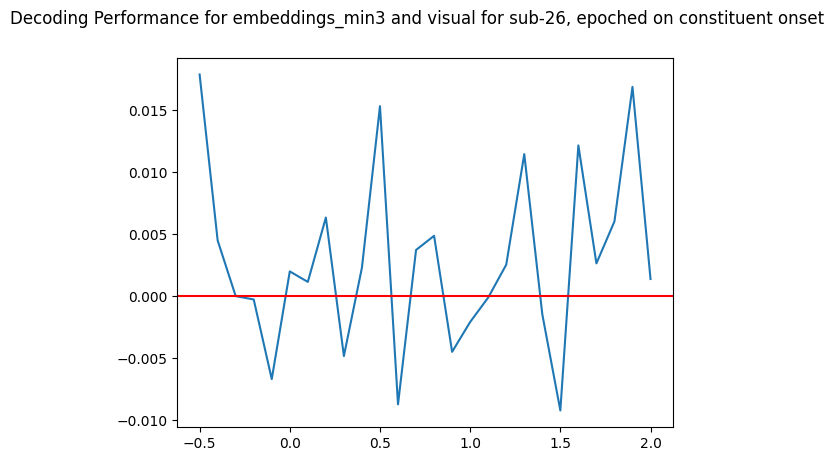

In [16]:
from dataset import unique_plot
import pandas as pd
subject = '26'
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(scores))

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

 constituent embeddings decoding
..........................

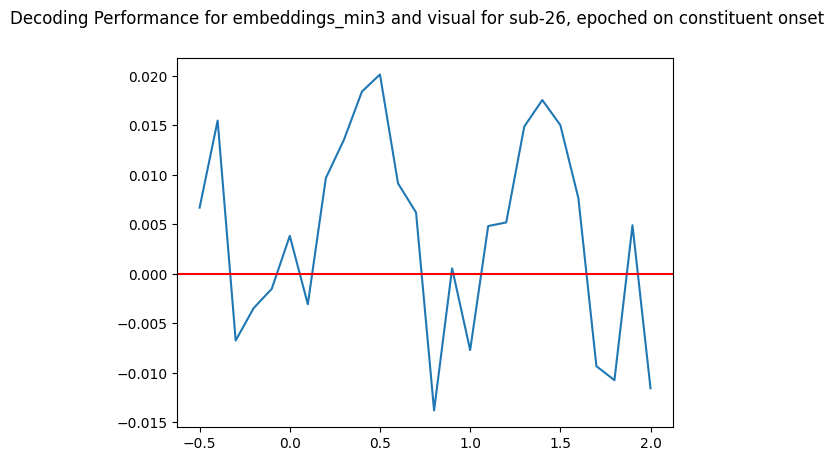

In [17]:
scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=1)
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(scores))

# Word level

Word embeddings decoding
For: word
..............

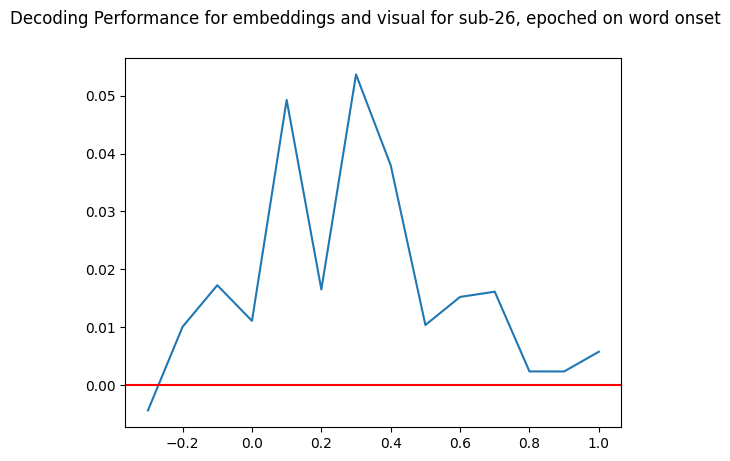

In [9]:
modality = "visual"
decoding_criterion = 'embeddings'
start = 'onset'
level = 'word'
subject = '26'


scores = fun_pierre(modality, decoding_criterion, start, level)
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(scores))


Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Word embeddings decoding
For: word
..............

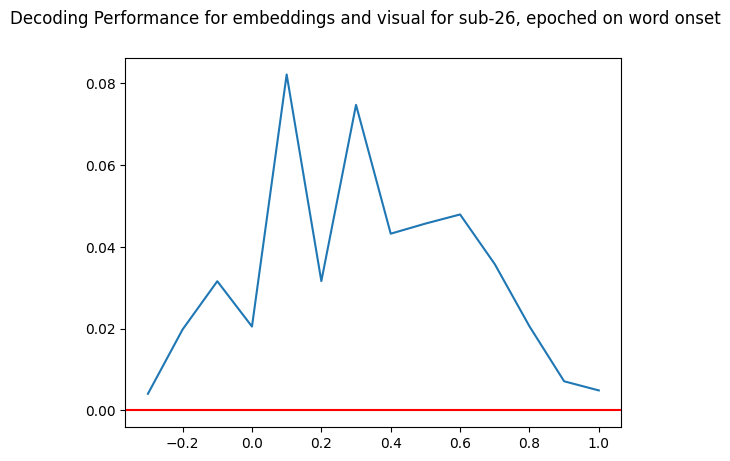

In [11]:
# To compare with run 1 official (when Pierre read)

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=1)
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(scores))

# Word length

Reading raw files for modality: visual

 Epoching for run 00, subject: 26

Decoding word length for: word
..............

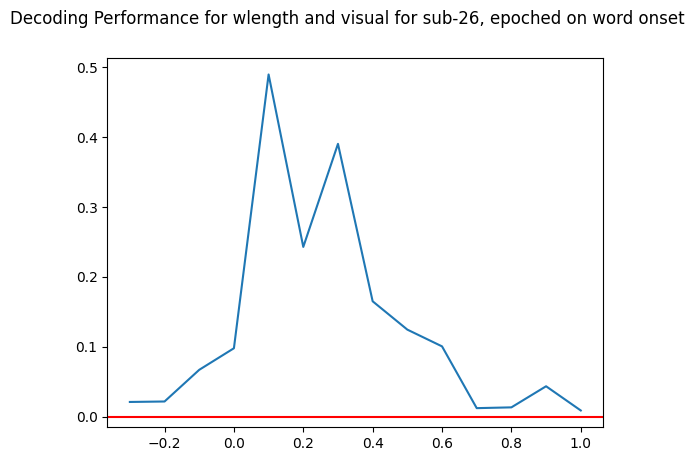

In [18]:
modality = "visual"
decoding_criterion = 'wlength'
start = 'onset'
level = 'word'
subject = '26'


scores = fun_pierre(modality, decoding_criterion, start, level)
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(scores))


Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Decoding word length for: word
..............

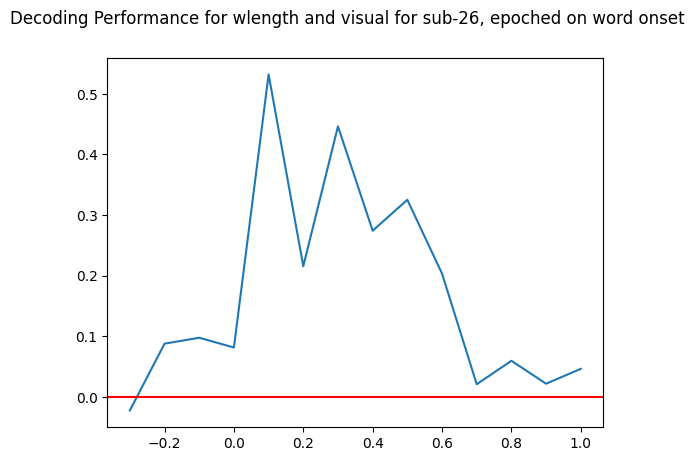

In [19]:
# To compare with run 1 official (when Pierre read)

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=1)
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(scores))

### Big analysis

In [29]:
from dataset import analysis_subject, get_subjects, get_path
import mne
mne.set_log_level(verbose='error')


# PB WITH SUB - 35 TO DEBUG RUN 5
modality = 'visual'
decoding_criterion = 'embeddings'
level = 'sentence'
start = 'onset'
path = get_path(modality)
subjects = get_subjects(path)[2:]



### Visual sentence onset embeddings analysis

In [31]:
for subject in subjects:
    try:
        analysis_subject(subject, modality, start, level, decoding_criterion)
    except Exception as e:
        print(e)

Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Analysis already done
Reading raw files for modality: visual

 Epoching for run 1, subject: 35

Reading raw files for modality: visual

 Epoching for run 2, subject: 35

Reading raw files for modality: visual

 Epoching for run 3, subject: 35

Reading raw files for modality: visual

 Epoching for run 4, subject: 35



### Visual sentence offset embeddings analysis

In [ ]:
start = 'offset'
for subject in subjects:
    try:
        analysis_subject(subject, modality, start, level, decoding_criterion)
    except Exception as e:
        print(e)

Reading raw files for modality: visual

 Epoching for run 1, subject: 3

Reading raw files for modality: visual

 Epoching for run 2, subject: 3

Reading raw files for modality: visual

 Epoching for run 3, subject: 3

Reading raw files for modality: visual

 Epoching for run 4, subject: 3

Reading raw files for modality: visual

 Epoching for run 5, subject: 3

Reading raw files for modality: visual

 Epoching for run 6, subject: 3

Reading raw files for modality: visual

 Epoching for run 7, subject: 3

Reading raw files for modality: visual

 Epoching for run 8, subject: 3

Reading raw files for modality: visual

 Epoching for run 9, subject: 3

 sentence embeddings decoding
...................................................Reading raw files for modality: visual

 Epoching for run 1, subject: 4

Reading raw files for modality: visual

 Epoching for run 2, subject: 4

Reading raw files for modality: visual

 Epoching for run 3, subject: 4

Reading raw files for modality: visual

 Ep

### Auditory sentence offset embeddings analysis

In [ ]:
modality = 'auditory'
path = get_path(modality)
subjects = get_subjects(path)[2:]
for subject in subjects:
    try:
        analysis_subject(subject, modality, start, level, decoding_criterion)
    except Exception as e:
        print(e)

### Auditory sentence onset embeddings analysis

In [ ]:
start = 'onset'
modality = 'auditory'

for subject in subjects:
    try:
        analysis_subject(subject, modality, start, level, decoding_criterion)
    except Exception as e:
        print(e)

## Plots


In [2]:
from dataset import sub_avg_plot

No decoding data for sub-35
No decoding data for sub-36
No decoding data for sub-37


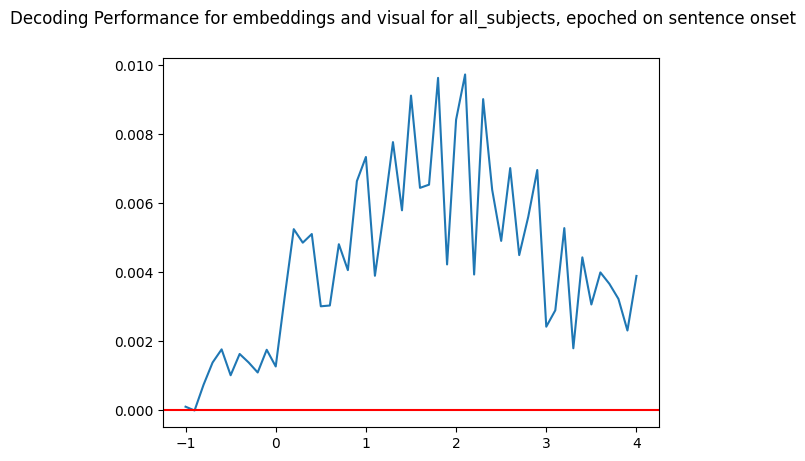

In [3]:
# Plot for visual sentence embeddings
sub_avg_plot(level, start, decoding_criterion, modality)

No decoding data for sub-16
No decoding data for sub-17
No decoding data for sub-18
No decoding data for sub-19
No decoding data for sub-20
No decoding data for sub-21
No decoding data for sub-22
No decoding data for sub-23
No decoding data for sub-24
No decoding data for sub-25
No decoding data for sub-26
No decoding data for sub-27
No decoding data for sub-28
No decoding data for sub-29
No decoding data for sub-30
No decoding data for sub-31
No decoding data for sub-32
No decoding data for sub-33
No decoding data for sub-34
No decoding data for sub-35
No decoding data for sub-36
No decoding data for sub-37
No decoding data for sub-38
No decoding data for sub-39
No decoding data for sub-40
No decoding data for sub-41
No decoding data for sub-42
No decoding data for sub-43
No decoding data for sub-44
No decoding data for sub-45
No decoding data for sub-46
No decoding data for sub-47
No decoding data for sub-48
No decoding data for sub-49
No decoding data for sub-50
No decoding data for

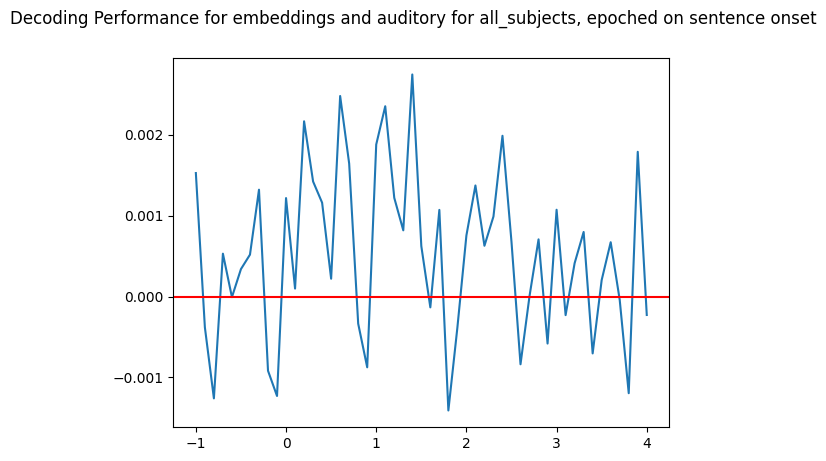

In [7]:
# Plot for auditory sentence embeddings
sub_avg_plot(level, start, decoding_criterion, modality)

### Small analyses

In [1]:
from dataset import analysis_subject, unique_plot
import mne
mne.set_log_level(verbose='error')
modality = 'visual'
start = 'onset'
level = 'sentence'
decoding_criterion = 'embeddings_multiple_words1'
subject = '26'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Multiple word decoding: for 1 words
...................................................

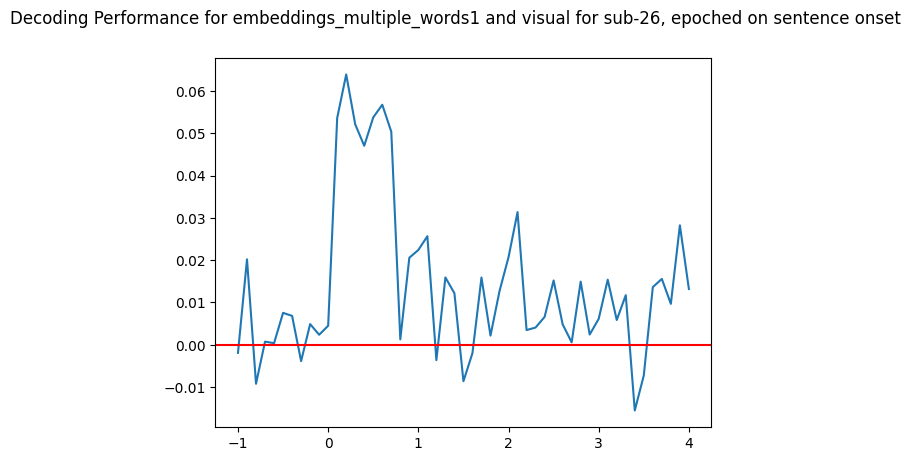

In [2]:
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Multiple word decoding: for 2 words
...................................................

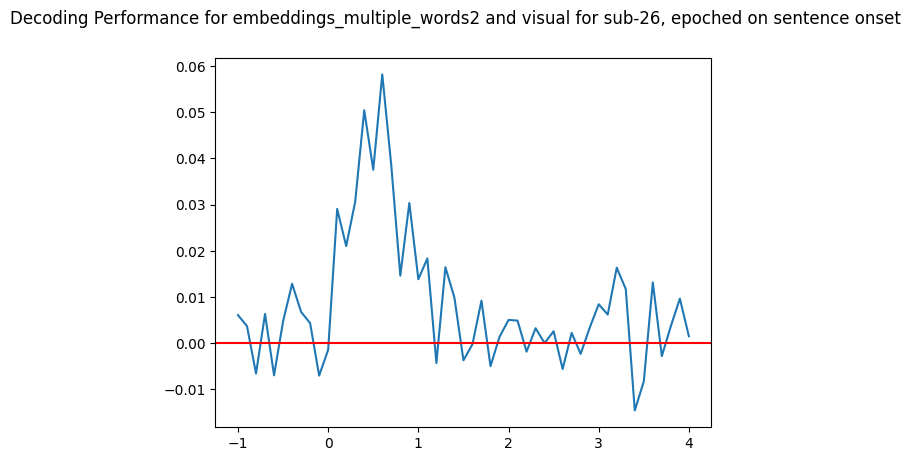

In [3]:
# Only changes from initial:
decoding_criterion = 'embeddings_multiple_words2'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Multiple word decoding: for 3 words
...................................................

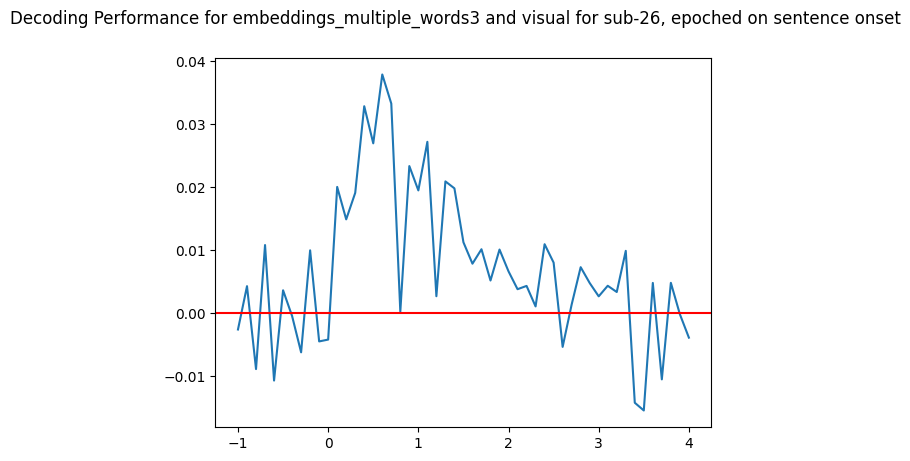

In [5]:
# Only changes from initial:
decoding_criterion = 'embeddings_multiple_words3'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Embeddings decoding
...................................................

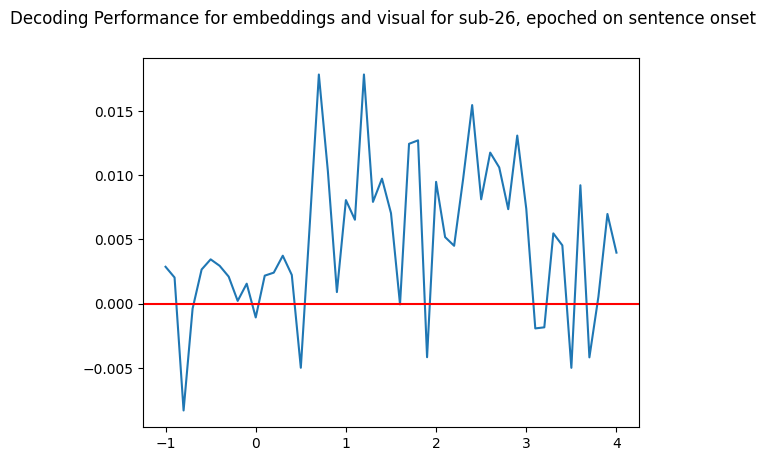

In [7]:
# Only changes from initial:
decoding_criterion = 'embeddings'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

## Decoding performances of word embeddings depending on whether the word is closing a constituant or not 

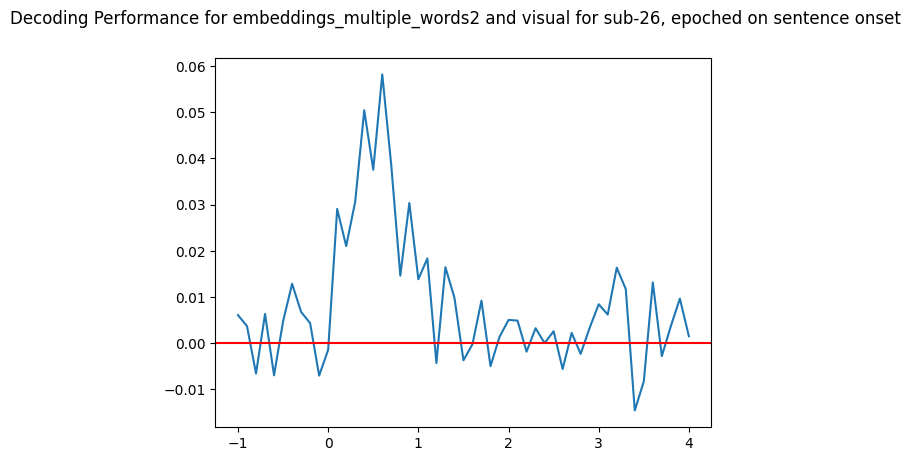

In [4]:
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Word embeddings decoding
For: word
..............

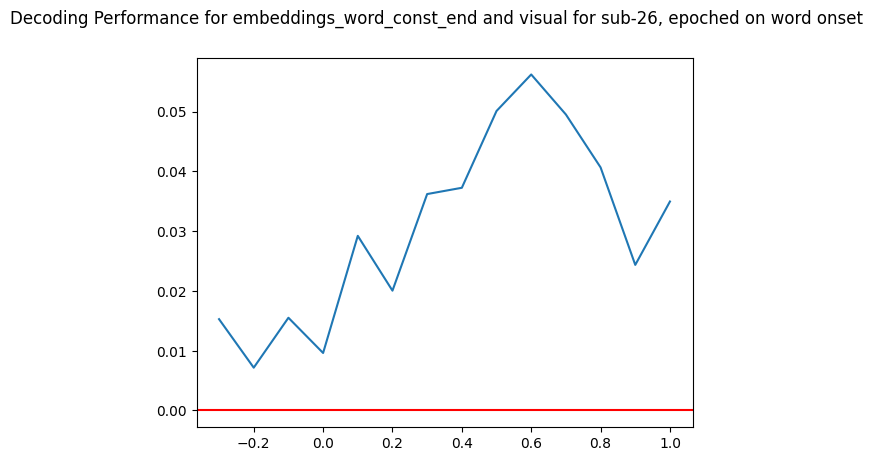

In [20]:
# Only changes from initial:
decoding_criterion = 'embeddings_word_const_end'
level = 'word'
start = 'onset'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Word embeddings decoding
For: word
..............

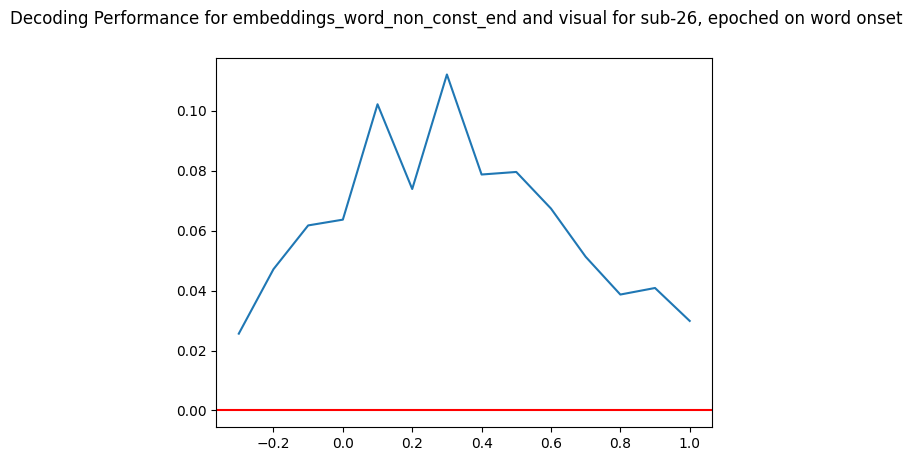

In [21]:
# Only changes from initial:
decoding_criterion = 'embeddings_word_non_const_end'


scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: auditory

 Epoching for run 1, subject: 26

Reading raw files for modality: auditory

 Epoching for run 2, subject: 26

Reading raw files for modality: auditory

 Epoching for run 3, subject: 26

Reading raw files for modality: auditory

 Epoching for run 4, subject: 26

Reading raw files for modality: auditory

 Epoching for run 5, subject: 26

Reading raw files for modality: auditory

 Epoching for run 6, subject: 26

Reading raw files for modality: auditory

 Epoching for run 7, subject: 26

Reading raw files for modality: auditory

 Epoching for run 8, subject: 26

Reading raw files for modality: auditory

 Epoching for run 9, subject: 26

Word embeddings decoding
For: word
..............

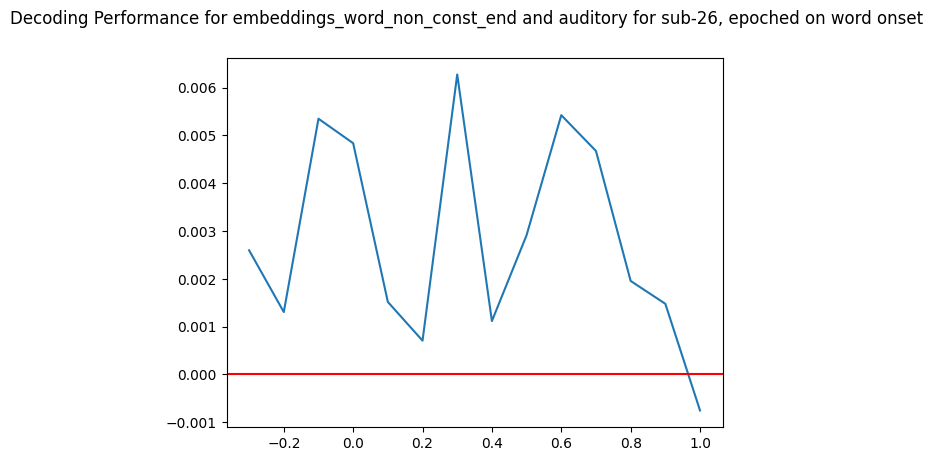

In [22]:
modality = "auditory"
scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)


In [23]:
start = "offset"


Reading raw files for modality: auditory

 Epoching for run 1, subject: 26

Reading raw files for modality: auditory

 Epoching for run 2, subject: 26

Reading raw files for modality: auditory

 Epoching for run 3, subject: 26

Reading raw files for modality: auditory

 Epoching for run 4, subject: 26

Reading raw files for modality: auditory

 Epoching for run 5, subject: 26

Reading raw files for modality: auditory

 Epoching for run 6, subject: 26

Reading raw files for modality: auditory

 Epoching for run 7, subject: 26

Reading raw files for modality: auditory

 Epoching for run 8, subject: 26

Reading raw files for modality: auditory

 Epoching for run 9, subject: 26

Word embeddings decoding
For: word
..............

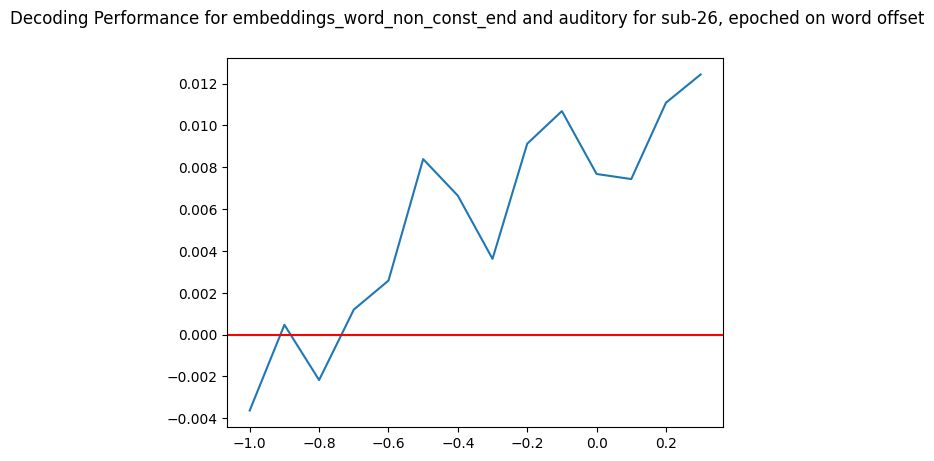

In [25]:
scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: auditory

 Epoching for run 1, subject: 26

Reading raw files for modality: auditory

 Epoching for run 2, subject: 26

Reading raw files for modality: auditory

 Epoching for run 3, subject: 26

Reading raw files for modality: auditory

 Epoching for run 4, subject: 26

Reading raw files for modality: auditory

 Epoching for run 5, subject: 26

Reading raw files for modality: auditory

 Epoching for run 6, subject: 26

Reading raw files for modality: auditory

 Epoching for run 7, subject: 26

Reading raw files for modality: auditory

 Epoching for run 8, subject: 26

Reading raw files for modality: auditory

 Epoching for run 9, subject: 26

Word embeddings decoding
For: word
..............

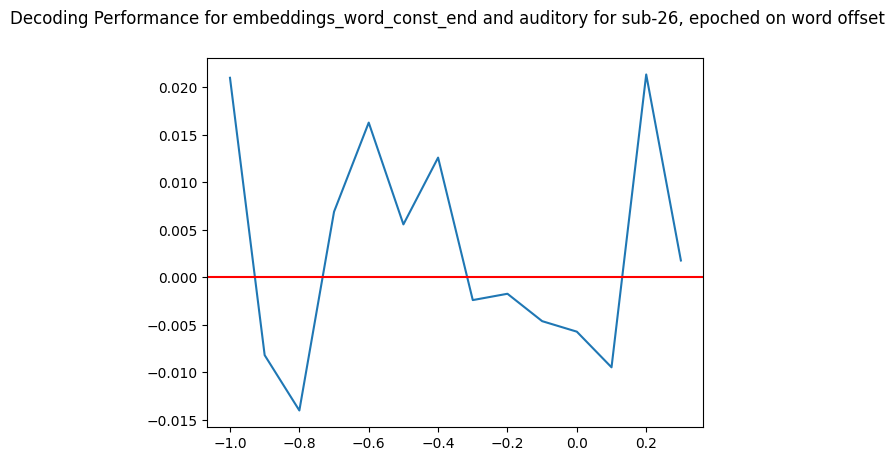

In [26]:
decoding_criterion = 'embeddings_word_const_end'
scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: auditory

 Epoching for run 1, subject: 26

Reading raw files for modality: auditory

 Epoching for run 2, subject: 26

Reading raw files for modality: auditory

 Epoching for run 3, subject: 26

Reading raw files for modality: auditory

 Epoching for run 4, subject: 26

Reading raw files for modality: auditory

 Epoching for run 5, subject: 26

Reading raw files for modality: auditory

 Epoching for run 6, subject: 26

Reading raw files for modality: auditory

 Epoching for run 7, subject: 26

Reading raw files for modality: auditory

 Epoching for run 8, subject: 26

Reading raw files for modality: auditory

 Epoching for run 9, subject: 26

Word embeddings decoding
For: word
..............

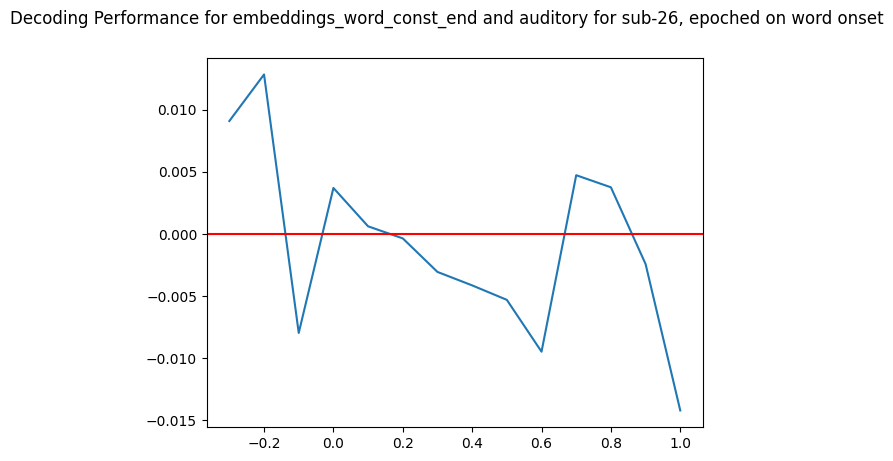

In [27]:
start = 'onset'
scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)